# Clustering and PCA Assignment

## Categorization of countries based on socio-economic and health factors and suggest the countries which are in direst need of aid

#### Problem Statement:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities
- Based on the socio-economic and health factors of various countries, the countries have to be categorized into different clusters
- To suggest the category of countries which are in direst need of the aid to the CEO of HELP International, for them to take necessary action 

## Step 1: Data Understanding

Importing NumPy, Pandas, sklearn and scipy libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing PCA
from sklearn.decomposition import PCA

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Read and Create dataframe from the country dataset
countries = pd.read_csv(r'D:/Maria/Data Science/Data Files/Country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Checking the Datatypes

In [3]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Datatypes are appropriate and no changes are required

### Checking for missing values in the dataset

In [4]:
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No missing values are observed

### Duplicate Values check

In [5]:
countries.duplicated().value_counts()

False    167
dtype: int64

No duplicate values found

### Checking the dataset size

In [6]:
countries.shape

(167, 10)

### Converting percentages to absolute values

In [7]:
# Converting the Percentage values of exports, imports and health to absolute values

countries['exports'] = countries['exports']*countries['gdpp']/100
countries['imports'] = countries['imports']*countries['gdpp']/100
countries['health'] = countries['health']*countries['gdpp']/100

In [8]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Checking for valid country names

In [9]:
countries['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

The country names are observed to be valid and no corrections required

### Statistics check

Statistics at specific percentiles

In [10]:
countries.describe(percentiles=[0.2,0.25,0.5,0.75,0.8,0.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
20%,6.320000,294.268000,55.060000,409.998800,2548.000000,1.408000,61.880000,1.630000,1146.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
80%,66.320000,10194.960000,1274.646000,9854.720000,29420.000000,12.500000,78.200000,4.592000,21020.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


## Step-2 Scaling the numeric variables to have a comparable scale
- Scaling Method used - Standardization

In [11]:
# creating a standard scaler instance
scaler = StandardScaler()

In [12]:
X = countries.copy()

In [13]:
X.drop('country',axis=1, inplace=True)

In [14]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Scaler - Fit and transform data
x = scaler.fit_transform(X)

In [15]:
df_scaled = pd.DataFrame(x, columns = X.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Step 3: Performing Principal Component Analysis (PCA)

In [16]:
# PCA at a random state of 50
pca = PCA(random_state=50)

In [17]:
pca.fit(x)

PCA(random_state=50)

In [18]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [19]:
# Variance ratio 
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

### Step 3a - Analysing the explained variance ratio and scree plot to find the optimal number of components 

<BarContainer object of 9 artists>

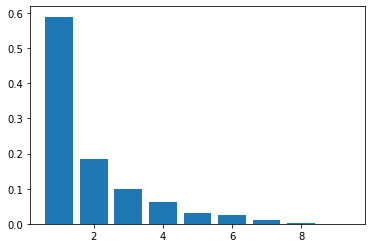

In [20]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [21]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

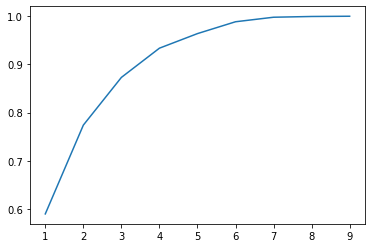

In [22]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

### Choosing the optimal number of components
#### The bar plot shows that approximately 94% variance is explained by 4 Principal components 
#### The Scree plot shows the elbow bend at approximately for value 4
#### Hence from the above observations, we choose the number of Principal Components to be 4

### Step 3b: Performing PCA with 4 components

In [23]:
pc2 = PCA(n_components=4, random_state=50)

In [24]:
X_PCA = pc2.fit_transform(x)

In [25]:
X_PCA.shape

(167, 4)

In [26]:
# To visualize how the original variables are loaded into the Principal Components after PCA
colnames = list(X.columns)
df_pc = pd.DataFrame({'Feature':colnames, 'PC1':pca.components_[0],'PC2':pca.components_[1],
                     'PC3':pca.components_[2],'PC4':pca.components_[3]})
df_pc

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052
1,exports,0.342887,0.397311,-0.030574,0.449425
2,health,0.358535,0.155053,-0.075703,-0.599712
3,imports,0.344865,0.370781,-0.072174,0.461798
4,income,0.380041,0.128384,0.145764,-0.154806
5,inflation,-0.143085,0.221261,0.948419,-0.007628
6,life_expec,0.343857,-0.369820,0.196752,-0.018395
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928
8,gdpp,0.399988,0.200624,0.010339,-0.364772


In [27]:
df = pd.DataFrame(X_PCA, columns=["PC1", "PC2","PC3", "PC4"])
df.head()

,PC1,PC2,PC3,PC4
0,-2.635575,1.472267,-0.549489,-0.242326
1,-0.024206,-1.429892,-0.014123,0.450645
2,-0.459557,-0.675495,0.959355,0.218456
3,-2.722630,2.172332,0.600215,-0.433978
4,0.648597,-1.023437,-0.257430,0.289201


In [28]:
y = countries['country']

In [29]:
df_final = pd.concat([df, y], axis=1)

#### The final dataframe with Principal components

In [30]:
df = df_final.copy()
df_final.head()

,PC1,PC2,PC3,PC4,country
0,-2.635575,1.472267,-0.549489,-0.242326,Afghanistan
1,-0.024206,-1.429892,-0.014123,0.450645,Albania
2,-0.459557,-0.675495,0.959355,0.218456,Algeria
3,-2.722630,2.172332,0.600215,-0.433978,Angola
4,0.648597,-1.023437,-0.257430,0.289201,Antigua and Barbuda


### Step 4: Outliers Analysis

In [31]:
df_final.shape

(167, 5)

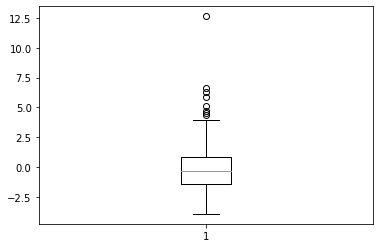

In [32]:
plt.boxplot(df_final.PC1)
Q1 = df_final.PC1.quantile(0.05)
Q3 = df_final.PC1.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.PC1 >= Q1) & (df_final.PC1 <= Q3)]

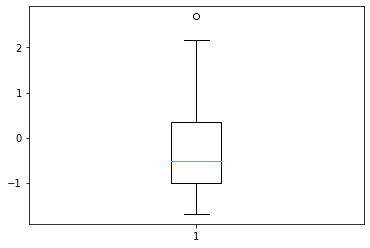

In [33]:
plt.boxplot(df_final.PC2)
Q1 = df_final.PC2.quantile(0.05)
Q3 = df_final.PC2.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.PC2 >= Q1) & (df_final.PC2 <= Q3)]

In [34]:
df_final.shape

(133, 5)

In [35]:
df.shape

(167, 5)

### The outliers that are less than 5 percentile and more than 95 percentiles are identified and removed
### List of 34 countries of outliers

In [36]:
index_list = df_final.index.values.tolist()
df_outliers = df[~df.index.isin(index_list)]
df_outliers

,PC1,PC2,PC3,PC4,country
1,-0.024206,-1.429892,-0.014123,0.450645,Albania
3,-2.722630,2.172332,0.600215,-0.433978,Angola
15,3.961652,0.834321,-0.271693,-0.289236,Belgium
20,0.250743,-1.694220,-0.241191,0.463144,Bosnia and Herzegovina
25,-2.751480,1.664991,-0.848207,-0.345046,Burkina Faso
26,-2.762440,1.628790,-0.299329,-0.309938,Burundi
31,-3.236946,2.178414,-1.602973,-0.337091,Central African Republic
32,-3.185395,2.354073,-1.078613,-0.567728,Chad
37,-3.114930,2.170747,0.361477,-0.433233,"Congo, Dem. Rep."
39,0.429282,-1.373866,0.266187,0.177497,Costa Rica


In [37]:
countries_all = countries.copy()
countries = countries_all.loc[df_final.index.values.tolist()]

In [38]:
df_final.shape

(133, 5)

In [39]:
countries.shape

(133, 10)

### Outliers Analysis:
- The outliers detected with the Principal components will be reported and also excluded from the analysis
- Since the dataset is quite small, this leads to 34 countries being removed
- Business understanding on the outliers is significantly important at this scenario

### Understanding the distribution of data points wrt PC1 and PC2

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

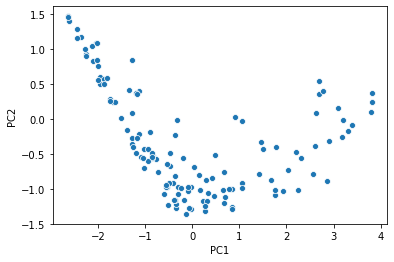

In [40]:
sns.scatterplot(x="PC1", y="PC2", data=df_final)

## Step 5: Hopkins Statistics - To understand the Clustering tendency

### Hopkins Algorithm

In [41]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [42]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_scaled)

0.9342499176966675

### The Hopkins Statistics shows that the dataset has the tendency to Clustering

## Step 6: K Means Clustering

### Step 6a: Analysing the value of K - The number of clusters required

In [43]:
df_PCA = df_final[["PC1","PC2","PC3","PC4"]]

In [44]:
x = pd.DataFrame(x)

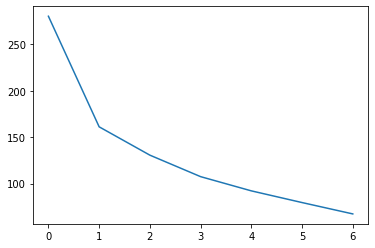

In [45]:
# Analyzing the number of clusters required using an elbow curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_PCA)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [81]:
ssd

[280.4833584701744,
 161.16089567219427,
 130.5958568258629,
 107.40425245426268,
 92.06165457375556,
 79.44064401368581,
 67.18784723516353]

In [82]:
kmeans.labels_

array([2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2,
       0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1,
       1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1,
       2])

In [46]:
# Analyzing the number of clusters required using silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_PCA)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_PCA, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4418524094721124
For n_clusters=3, the silhouette score is 0.43694614366503104
For n_clusters=4, the silhouette score is 0.3690008445107467
For n_clusters=5, the silhouette score is 0.3800825393015474
For n_clusters=6, the silhouette score is 0.3409657193551752
For n_clusters=7, the silhouette score is 0.3400703807926883
For n_clusters=8, the silhouette score is 0.3605750938948624


### Performing K-Means with different values of k
### Iteration 1: K=3

In [47]:
# Model 1 with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=50)
kmeans.fit(df_PCA)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [48]:
kmeans.labels_

array([2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2,
       0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1,
       1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1,
       2])

In [49]:
# assign the label
df_final['cluster_id'] = kmeans.labels_
df_final.head()

,PC1,PC2,PC3,PC4,country,cluster_id
0,-2.635575,1.472267,-0.549489,-0.242326,Afghanistan,2
2,-0.459557,-0.675495,0.959355,0.218456,Algeria,1
4,0.648597,-1.023437,-0.257430,0.289201,Antigua and Barbuda,1
5,0.035422,-0.685251,1.468697,-0.028838,Argentina,1
6,-0.334555,-1.271889,0.190564,0.500247,Armenia,1


### Plotting clusters against PC1 and PC2 values

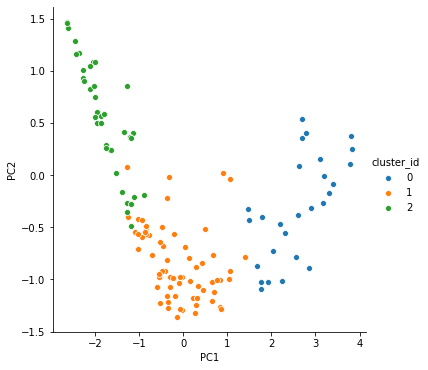

In [50]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_id", size=5)

In [51]:
countries['cluster_id'] = kmeans.labels_

In [52]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1


### Plotting clusters against GDPP and CHILD_MORT 

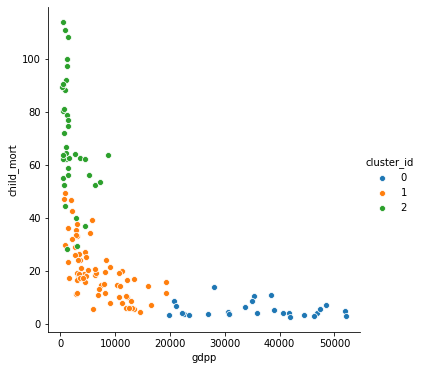

In [53]:
sns.pairplot(data=countries, x_vars=["gdpp"], y_vars=["child_mort"], hue = "cluster_id", size=5)

### Plotting clusters against INCOME and CHILD_MORT

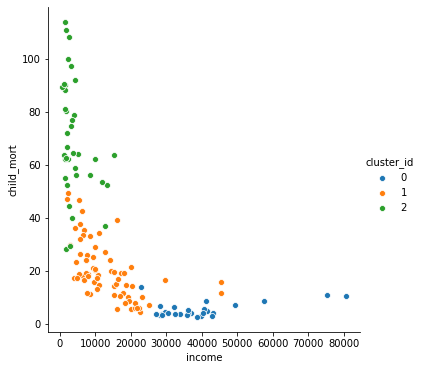

In [54]:
sns.pairplot(data=countries, x_vars=["income"], y_vars=["child_mort"], hue = "cluster_id", size=5)

### Iteration 2: K=5

In [55]:
# Model 2 with k=5
kmeans2 = KMeans(n_clusters=5, max_iter=50, random_state=50)
kmeans2.fit(df_PCA)

KMeans(max_iter=50, n_clusters=5, random_state=50)

In [56]:
kmeans2.labels_

array([2, 1, 4, 1, 3, 0, 0, 3, 4, 4, 3, 4, 1, 3, 2, 3, 3, 2, 4, 0, 4, 3,
       2, 0, 3, 4, 3, 3, 2, 2, 4, 0, 4, 3, 3, 3, 3, 2, 4, 3, 0, 0, 2, 2,
       3, 0, 2, 0, 3, 3, 2, 3, 4, 0, 3, 3, 1, 2, 0, 0, 3, 0, 3, 1, 2, 2,
       0, 3, 2, 4, 2, 2, 1, 4, 2, 4, 4, 0, 2, 4, 3, 3, 1, 3, 3, 2, 3, 0,
       1, 2, 4, 3, 3, 3, 4, 4, 4, 1, 2, 3, 1, 2, 4, 4, 4, 2, 2, 4, 0, 1,
       3, 2, 3, 0, 3, 2, 2, 2, 3, 3, 4, 3, 2, 3, 0, 0, 0, 4, 3, 3, 1, 3,
       2])

In [57]:
# assign the label
df_final['cluster_id_2'] = kmeans2.labels_
df_final.head()

,PC1,PC2,PC3,PC4,country,cluster_id,cluster_id_2
0,-2.635575,1.472267,-0.549489,-0.242326,Afghanistan,2,2
2,-0.459557,-0.675495,0.959355,0.218456,Algeria,1,1
4,0.648597,-1.023437,-0.257430,0.289201,Antigua and Barbuda,1,4
5,0.035422,-0.685251,1.468697,-0.028838,Argentina,1,1
6,-0.334555,-1.271889,0.190564,0.500247,Armenia,1,3


### Plotting clusters against PC1 and PC2 values

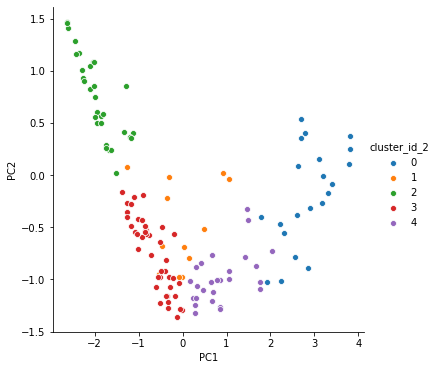

In [58]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_id_2", size=5)

In [59]:
countries['cluster_id_2'] = kmeans2.labels_

### Plotting clusters against GDPP and CHILD_MORT values

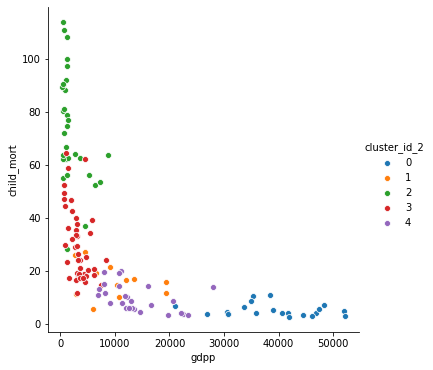

In [60]:
sns.pairplot(data=countries, x_vars=["gdpp"], y_vars=["child_mort"], hue = "cluster_id_2", size=5)

### Plotting clusters against INCOME and CHILD_MORT values

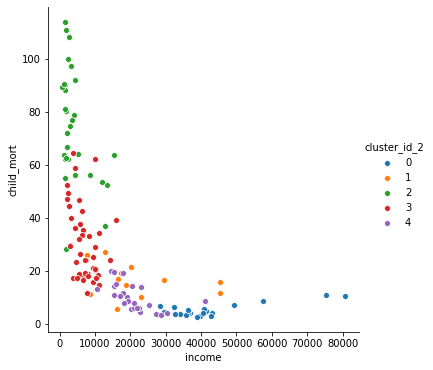

In [61]:
sns.pairplot(data=countries, x_vars=["income"], y_vars=["child_mort"], hue = "cluster_id_2", size=5)

### From the two iterations above, we choose the value of k = 5, the number of clusters which segments the countries satisfactorily

## Step 6b - Identification of the cluster of countries which are in direst need

### Based on the understanding from the clusters above, the clusters with ID = 2 shows countries with high child mortality rate and lower income and lower GDPP 
### Hence these countries are identified to be those in direst need of the aid

In [62]:
countries_kmeans = countries.loc[countries['cluster_id_2']==2]

In [63]:
# Ordering the list of countries in need - by GDPP ascending, child_mort descending and income ascending
countries_kmeans.sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True], inplace=True)

### List of countries - Identified by K-Means Clustering algorithm

In [64]:
countries_kmeans[['country','child_mort','income','gdpp']]

,country,child_mort,income,gdpp
88,Liberia,89.3,700,327
93,Madagascar,62.2,1390,413
50,Eritrea,55.2,1420,482
150,Togo,90.3,1210,488
64,Guinea-Bissau,114.0,1390,547
0,Afghanistan,90.2,1610,553
56,Gambia,80.3,1660,562
126,Rwanda,63.6,1350,563
155,Uganda,81.0,1540,595
147,Tanzania,71.9,2090,702


## Step 7: Hierarchical Clustering

In [65]:
df_PCA.head()

,PC1,PC2,PC3,PC4
0,-2.635575,1.472267,-0.549489,-0.242326
2,-0.459557,-0.675495,0.959355,0.218456
4,0.648597,-1.023437,-0.257430,0.289201
5,0.035422,-0.685251,1.468697,-0.028838
6,-0.334555,-1.271889,0.190564,0.500247


### Merging Clusters using SINGLE LINKAGE METHOD

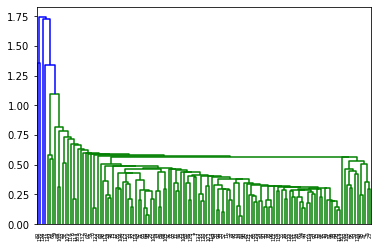

In [66]:
mergings_single = linkage(df_PCA, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

### Merging Clusters using COMPLETE linkage Method

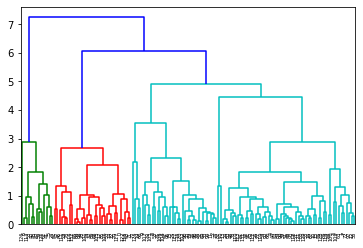

In [67]:
mergings = linkage(df_PCA, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### When compared with single and complete linkage, the clusters are better defined in COMPLETE linkage.
### Hence we choose the complete linkage

### Choosing 4 as the number of clusters from the dendogram of COMPLETE linkage

In [68]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 2, 1, 1, 3, 3, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1,
       0, 3, 1, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3, 3, 0, 0,
       1, 3, 0, 2, 1, 1, 0, 1, 2, 3, 1, 1, 1, 0, 2, 3, 1, 3, 1, 1, 0, 0,
       2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 3,
       1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 1, 3, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 3, 3, 2, 1, 1, 1, 1,
       0])

In [69]:
df_final['cluster_labels'] = cluster_labels
df_final.head()

,PC1,PC2,PC3,PC4,country,cluster_id,cluster_id_2,cluster_labels
0,-2.635575,1.472267,-0.549489,-0.242326,Afghanistan,2,2,0
2,-0.459557,-0.675495,0.959355,0.218456,Algeria,1,1,1
4,0.648597,-1.023437,-0.257430,0.289201,Antigua and Barbuda,1,4,2
5,0.035422,-0.685251,1.468697,-0.028838,Argentina,1,1,1
6,-0.334555,-1.271889,0.190564,0.500247,Armenia,1,3,1


In [70]:
countries['cluster_labels'] = cluster_labels
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id_2,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,4,2
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,1,1,1
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1,3,1


### Visualizing the cluster of countries wrt PC1 and PC2 values

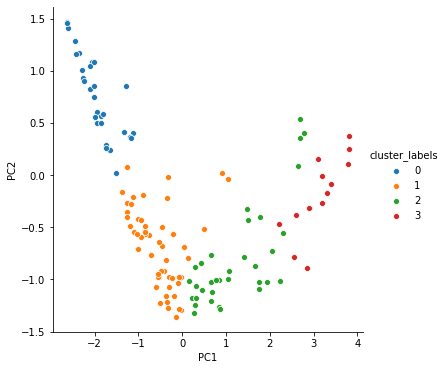

In [71]:
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_labels", size=5)

### Visualizing the cluster of countries wrt GDPP and CHILD_MORT values

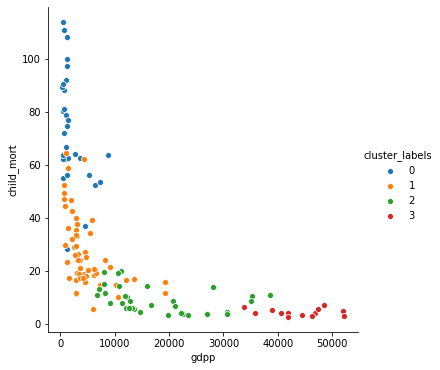

In [72]:
sns.pairplot(data=countries, x_vars=["gdpp"], y_vars=["child_mort"], hue = "cluster_labels", size=5)

### Visualizing the cluster of countries wrt INCOME and CHILD_MORT values

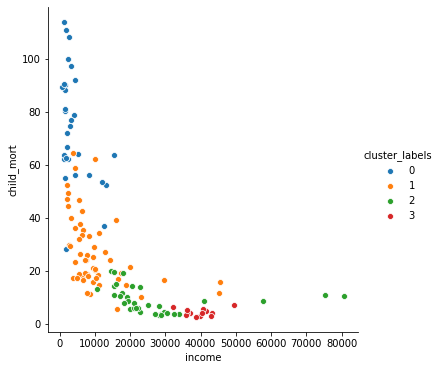

In [73]:
sns.pairplot(data=countries, x_vars=["income"], y_vars=["child_mort"], hue = "cluster_labels", size=5)

In [74]:
countries_hierarchical = countries.loc[countries['cluster_labels']==0]

In [75]:
countries_hierarchical.sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True], inplace=True)

In [76]:
countries_hierarchical

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id_2,cluster_labels
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327,2,2,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.790,60.8,4.60,413,2,2,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.600,61.7,4.61,482,2,2,0
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.180,58.7,4.87,488,2,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,2,2,0
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,2,2,0
56,Gambia,80.3,133.7560,31.9778,239.974,1660,4.300,65.5,5.71,562,2,2,0
126,Rwanda,63.6,67.5600,59.1150,168.900,1350,2.610,64.6,4.51,563,2,2,0
155,Uganda,81.0,101.7450,53.6095,170.170,1540,10.600,56.8,6.15,595,2,2,0
147,Tanzania,71.9,131.2740,42.1902,204.282,2090,9.250,59.3,5.43,702,2,2,0


## Step 8: Choosing the better algorithm:
### Both Hierarchical and K-Means Clustering algorithm demonstrates a stable model
### Since the Countries is a smaller dataset, we choose hierarchical clustering

In [77]:
countries_kmeans.shape

(31, 12)

In [78]:
countries_hierarchical.shape

(31, 13)

### Comparing K-Means and Hierarchical Algorithm

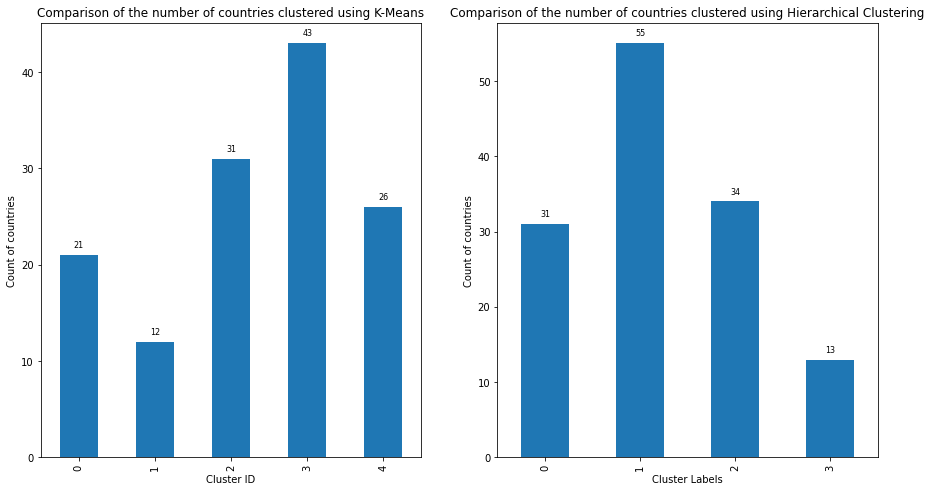

In [79]:
# K-Means
df1 = countries.groupby(['cluster_id_2'])['country'].count()

# Hierarchical
df2 = countries.groupby(['cluster_labels'])['country'].count()

# Bar Plot for K-Means Clustering Algorithm
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
g = df1.plot.bar()
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=8)

plt.title('Comparison of the number of countries clustered using K-Means')
plt.xlabel('Cluster ID')
plt.ylabel('Count of countries') 

# Bar Plot for Hierarchical Clustering Algorithm
plt.subplot(1,2,2)
g = df2.plot.bar()
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=8)

plt.title('Comparison of the number of countries clustered using Hierarchical Clustering')
plt.xlabel('Cluster Labels')
plt.ylabel('Count of countries') 
plt.show()

## Step 9: Final Report of Countries:
### List of countries in need - by GDPP ascending, child_mort descending and income ascending

In [80]:
# list of countries in need - by GDPP ascending, child_mort descending and income ascending
countries_hierarchical[['country','child_mort','income','gdpp']]

,country,child_mort,income,gdpp
88,Liberia,89.3,700,327
93,Madagascar,62.2,1390,413
50,Eritrea,55.2,1420,482
150,Togo,90.3,1210,488
64,Guinea-Bissau,114.0,1390,547
0,Afghanistan,90.2,1610,553
56,Gambia,80.3,1660,562
126,Rwanda,63.6,1350,563
155,Uganda,81.0,1540,595
147,Tanzania,71.9,2090,702
